In [13]:
import tensorflow as tf
import numpy as np
import seaborn as sns # pip install seaborn

## Aplicando a rede neural para simular o operador XOR e vamos aplicar a função de ativação sigmóide

1 e 1 = 1

1 e 0 = 0

0 e 1 = 0

0 e 0 = 1

Podemos notar que não é um problema linearmente separável, o que o torna um pouco mais complexo e que necessita de mais de uma camada para resolvê-lo.

In [2]:
# definindo os dados
X = np.array([[0.0, 0.0],
              [0.0, 1.0],
              [1.0, 0.0],
              [1.0, 1.0]])

Y = np.array([[1.0], [0.0], [0.0], [1.0]])

print("Atributos: \n", X)
print("\nLabels: \n", Y)

Atributos: 
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

Labels: 
 [[1.]
 [0.]
 [0.]
 [1.]]


In [3]:
# Agora vamos definir as quantidades de cada neurônios
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

O que estamos definindo ali acima pode ser representado pela figura abaixo:
![](camada_oculta.png)

In [4]:
# Definindo as vaariáveis de cada peso
W = {'oculta': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta]), name = 'w_oculta'), 
     'saida': tf.Variable(tf.random_normal([neuronios_oculta, neuronios_saida]), name = 'w_saida')}
# Teremos que a variavel oculta será uma matriz de 2 linhas e 3 colunas

# Visualizando os tipos das variáveis
print("\n W: ", W)
print("\n\n type(W['oculta']): ", type(W['oculta']))
print("\n\n W[\'oculta\']: ", W['oculta'])

Instructions for updating:
Colocations handled automatically by placer.

 W:  {'oculta': <tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32_ref>, 'saida': <tf.Variable 'w_saida:0' shape=(3, 1) dtype=float32_ref>}


 type(W['oculta']):  <class 'tensorflow.python.ops.variables.RefVariable'>


 W['oculta']:  <tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32_ref>


In [5]:
# Agora vamos visualizar os valores dos pesos dentro de uma sessão
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(W['oculta']))

[[ 0.98226136 -1.4676868   0.48226583]
 [ 1.6409703  -0.26237506 -0.6965257 ]]


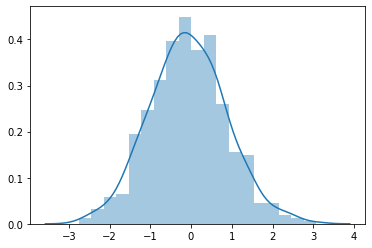

In [6]:
# Vamos visualizar uma distribuição normal agora, pois geramos os pesos iniciais através de uma distr. normal
distribuicao = np.random.normal(size = 500) # gera uma distribuição normal de 500 números com média zero e desvio padrão 1

%matplotlib inline
sns.distplot(distribuicao)

Portanto, agora temos que aplicar o bias, que está representado na imagem abaixo de como será:
![](bias_in_RNA.jpg)

In [7]:
# Teremos o bias da camada oculta, que é equivalente ao b1 da imagem
# E teremos o bias da camada de saída, que é equivalente ao b2 da imagem

B = {'oculta': tf.Variable(tf.random_normal([neuronios_oculta]), name = 'b_oculta'),
     'saida': tf.Variable(tf.random_normal([neuronios_saida]), name = 'b_saida')}

In [9]:
# Visualizando os tipos das variáveis
print("\n B: ", B)
print("\n\n type(B['oculta']): ", type(B['oculta']))
print("\n\n B[\'oculta\']: ", B['oculta'])


 B:  {'oculta': <tf.Variable 'b_oculta:0' shape=(3,) dtype=float32_ref>, 'saida': <tf.Variable 'b_saida:0' shape=(1,) dtype=float32_ref>}


 type(B['ocult?a']):  <class 'tensorflow.python.ops.variables.RefVariable'>


 B['oculta']:  <tf.Variable 'b_oculta:0' shape=(3,) dtype=float32_ref>


In [12]:
# Agora vamos visualizar os valores dos pesos dentro de uma sessão
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print("\nBias da camada oculta: ", sess.run(B['oculta']))
    print("\nBias da camada de saída: ", sess.run(B['saida']))


Bias da camada oculta:  [0.45717108 1.1447567  2.339163  ]

Bias da camada de saída:  [0.20833021]


De acordo com a figura que ilustra os bias, podemos ver que de fato o b1 possui 3 valores de pesos e o b2 possui apenas um valor de peso.

Agora iremos definir os placeholder para que a gente possa receber os dados dinamicamente pelo tensorflow.


In [14]:
# Nesse caso, sabemos que temos apenas 4 linhas nas entradas que definimos e nos labels que definimos.
xph = tf.placeholder(tf.float32, [4, neuronios_entrada], name = 'xph')
yph = tf.placeholder(tf.float32, [4, neuronios_saida], name = 'yph')

In [18]:
# agora vamos fazer o somatório dos inputs multiplicados pelos pesos e ainda assim vamos acrescentar o bias
camada_oculta = tf.add(tf.matmul(xph, W['oculta']), B['oculta'])

# Agora vamos visualizar os valores da nossa camada oculta
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_oculta, feed_dict = {xph: X}))

[[ 0.24567448 -1.6559026  -0.5971939 ]
 [ 0.3528159  -0.0768621  -1.90611   ]
 [ 0.48056334 -4.6821976   2.417225  ]
 [ 0.5877048  -3.1031573   1.1083088 ]]


Podemos notar que as linhas representam a somatória de cada entrada (os inputs em X) e as colunas representa o peso de cada neurônio.

In [20]:
# Então, aplicamos a função de ativação sigmóide 
camada_oculta_ativacao = tf.sigmoid(camada_oculta)

# Agora vamos visualizar os valores da aplicação da função de ativação
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_oculta_ativacao, feed_dict = {xph: X}))

[[0.8162335  0.7453909  0.6032174 ]
 [0.6753337  0.96992886 0.29978812]
 [0.7681213  0.81117475 0.36089855]
 [0.60804635 0.9793088  0.13720955]]


No caso da função sigmóide podemos ver que de fato ela foi aplicada pois só temos valores entre 0 e 1.

Portanto, agora vamo precisar fazer a multiplicação dos neurônios da camada oculta com os seus respectivos pesos e depois fazer sua soma. Assim poderemos aplicar a função de ativação ao resultado e descobrir o resultado do neurônio de saída.

In [23]:
# agora vamos fazer o somatório dos neurônios da camada oculta multiplicados pelos pesos 
# e ainda assim vamos acrescentar o seu respectivo bias
camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), B['saida'])

# Agora vamos visualizar os valores da nossa camada de saída
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_saida, feed_dict = {xph: X}))


[[1.1449908]
 [1.0744171]
 [1.229555 ]
 [1.1975654]]


In [25]:
# Então, aplicamos a função de ativação sigmóide 
c = tf.sigmoid(camada_saida)

# Agora vamos visualizar os valores da aplicação da função de ativação
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_saida_ativacao, feed_dict = {xph: X}))

[[0.7705323]
 [0.8164624]
 [0.8230132]
 [0.8420887]]


In [27]:
# Para otimizarmos os resultados, vamos utilizar os otimizadores do próprio tensorflow

# Para minimizarmos o erro, calculamos ele inicialmente. Nota que o erro será calculado com o erro médio quadrado
erro = tf.losses.mean_squared_error(yph, camada_saida_ativacao) 

# minimizando erro com gradiente descendente
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.3).minimize(erro) 

In [30]:
# Agora vamos executar várias épocas para otimizar o erro
with tf.Session() as sess:
    sess.run(init)
    
    for epocas in range(10000):
        erro_medio = 0
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: X, yph: Y})
        if epocas % 2000 == 0:
            erro_medio += custo / 4 # 4 é a quantidade de registros que temos em X
            print("\nErro médio:", erro_medio)
            
    # Aqui teremo o pesos e os bias finais otimizados
    W_final, B_final = sess.run([W, B])


Erro médio: 0.10140436887741089

Erro médio: 0.005101326387375593

Erro médio: 0.001010154839605093

Erro médio: 0.0005240174359641969

Erro médio: 0.0003480878658592701


Podemos observar que o erro médio vai diminuindo após cada interação, o que era esperado.

In [31]:
# Agora que encontramos os pesos e os bias finais, podemos aplicar de fato no "banco de dados" que é o X.


camada_oculta_teste = tf.add(tf.matmul(xph, W_final['oculta']), B_final['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, W_final['saida']), B_final['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_saida_ativacao_teste, feed_dict = {xph: X}))

[[0.97444284]
 [0.03067976]
 [0.0348474 ]
 [0.96349394]]


OBS: A maioria das bibliotecas que trabalham com a regressão logística, eles assumem que se o valor acima for maior que 0.95 é considerado da classe 1 e quando é menor que 0.05 é considerado da classe 0.